# Are Whale Sightings in Southern California Correlated with Temperature?

The whale data below I'm scraping from the whale sightings log of a whale watching company in Dana Point, CA.  The website is: http://www.dolphinsafari.com/sightingslog/whale-watching-sightings-archive.  

My goal is to combine ocean temperature data and whale sightings to analyze the affects of climate change on the whales seen in Southern California. This is done in my other python notebook on my Github.  Here, I'm simply collecting the data.

First we load required packages

In [1]:
import requests
from lxml import html
from pprint import pprint
import json
import csv
import numpy as np
import matplotlib.pyplot as plt
import re

Now we're able to get all the HTML code from http://www.dolphinsafari.com/sightingslog/whale-watching-sightings-archive, and we will use Xpath to access the it.

In [2]:
url_base = 'http://www.dolphinsafari.com/sightingslog/'
main_page = requests.get('http://www.dolphinsafari.com/sightingslog/whale-watching-sightings-archive')
if main_page.status_code != 200:
    print('Error: page status code is'), ; print(product_page.status_code) 
tree = html.fromstring(main_page.content)

In [3]:
print(tree)

<Element html at 0x114dc9f98>


Great, we have all the HTML code that makes up the main webpage stored as "tree".  We can now use "tree" to pull out the specific information that we want.  First, we're going to want the urls to all of the years containing whale sightings, e.g. the url to "2002 View Sightings", etc.  The following line of code finds us all these urls and stores them in a list.

In [4]:
years = tree.xpath('//*[@id="post-14476"]/div/div[6]/div[*]/div[*]/div/div/p/a/@href')

Let's see how many years worth of logs it found.  We expect 17 since the website has data from 2002-2018.

In [5]:
print(len(years))

17


Since there are only 17 urls, let's print them to make sure it looks as we expect: 

In [6]:
print(years)

['http://www.dolphinsafari.com/sightingslog/sightings-02', 'http://www.dolphinsafari.com/sightingslog/sightings-03', 'http://www.dolphinsafari.com/sightingslog/sightings-04', 'http://www.dolphinsafari.com/sightingslog/sightings-05', 'http://www.dolphinsafari.com/sightingslog/sightings-06', 'http://www.dolphinsafari.com/sightingslog/sightings-07', 'http://www.dolphinsafari.com/sightingslog/sightings-08', 'http://www.dolphinsafari.com/sightingslog/sightings-09', 'http://www.dolphinsafari.com/sightingslog/sightings-10', 'http://www.dolphinsafari.com/sightingslog/sightings-11', 'http://www.dolphinsafari.com/sightingslog/whale-watching-sightings-log-2012', 'http://www.dolphinsafari.com/sightingslog/whale-watching-sightings-log-2013', 'http://www.dolphinsafari.com/sightingslog/dana-point-whale-watching-sightings-log-2014', 'http://www.dolphinsafari.com/sightingslog/dana-point-whale-watching-sightings-log-2015', 'http://www.dolphinsafari.com/sightingslog/2016-whale-watching-sightings', 'http:

Perfect!  We're got all the urls stored in "years".  However, looking at the 2002 data on the website, they weren't always recording the number of whales they saw, but rather reporting whales vs no whales.  For this reason, I'm not going to use the 2002 data.  Additionally, the 2004 and 2005 data tables are identical, so I think it makes the most sense to just collect from 2005-2017.  The later data is in a nicer format and easier to collect, so I'll start from 2017 and work backwards.

***
## 2017 Data

In [7]:
y = years[15] #2017
# first we get the HTML code from this specific year's url:
year_page = requests.get(y)
tree = html.fromstring(year_page.content)

dates = tree.xpath('//*[@id="tablepress-6"]/tbody/tr[*]/td[1]/text()')
print(len(dates))  #need 365

365


In [8]:
rev_data_2017 = np.zeros((365,9))
#rev_data_2017 columns are: ['Day', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

for i in range(2,367):
    rev_data_2017[i-2,0]=367-i
    temp = ' '.join(tree.xpath('//*[@id="tablepress-6"]/tbody/tr['+ str(i-1) + ']/td[3]//text()'))
    gray = (re.findall(r"(\d+)\s*Gray", temp))
    if gray:  #if the list is not empty, ie a whale was found
        rev_data_2017[i-2,1]=int(gray[0])
    fin = (re.findall(r"(\d+)\s*Fin", temp))
    if fin:  #if the list is not empty, ie a whale was found
        rev_data_2017[i-2,2]=int(fin[0])
    humpback = (re.findall(r"(\d+)\s*Humpback", temp))
    if humpback:  #if the list is not empty, ie a whale was found
        rev_data_2017[i-2,3]=int(humpback[0])
    blue = (re.findall(r"(\d+)\s*Blue", temp))
    if blue:  #if the list is not empty, ie a whale was found
        rev_data_2017[i-2,4]=int(blue[0])
    minke = (re.findall(r"(\d+)\s*Minke", temp))
    if minke:  #if the list is not empty, ie a whale was found
        rev_data_2017[i-2,5]=int(minke[0])
    falsek = (re.findall(r"(\d+)\s*False", temp))
    if falsek:  #if the list is not empty, ie a whale was found
        rev_data_2017[i-2,6]=int(falsek[0])
    orca = (re.findall(r"(\d+)\s*Killer", temp))
    if orca:  #if the list is not empty, ie a whale was found
        rev_data_2017[i-2,7]=int(orca[0])
    sei = (re.findall(r"(\d+)\s*Sei", temp))
    if sei:  #if the list is not empty, ie a whale was found
        rev_data_2017[i-2,8]=int(sei[0])
#print(rev_data_2017[0:20,:])
data_2017 = rev_data_2017[::-1]
#print(data_2017[:15,:])

In [9]:
#again the Orca's are not caught by my query due to changing wording, so I manually fix the 3 bugs here
data_2017[313,7] = 2   #"2 Eastern Tropical Pacific (ETP) Killer Whales" on Nov 10 were not picked up by my code
data_2017[278,7] = 10 #"10 Bigg's (Transient) Killer Whales" on Oct 6 were not picked up by my code
data_2017[6,7] = 5 #"5 Eastern Tropical Pacific (ETP) Killer Whales" on Jan 7 were not picked up by my code

In [10]:
grays = data_2017[:,1]  #gray whales are column 2 - no heading
grays_2017 = list(map(int, grays))

blues = data_2017[0:,4]  #blue whales are column 5 - no heading
blues_2017 = list(map(int, blues))

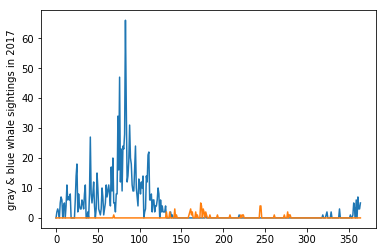

In [11]:
#for the meaned data (i.e. days w/o data were entered as the mean of the surrounding days) of gray whales in 2017
plt.plot(grays_2017)
plt.plot(blues_2017)
plt.ylabel('gray & blue whale sightings in 2017')
plt.show()

***
## 2016 Data

In [12]:
y = years[14] #2016
# first we get the HTML code from this specific year's url:
year_page = requests.get(y)
tree = html.fromstring(year_page.content)

dates = tree.xpath('//*[@id="tablepress-3"]/tbody/tr[*]/td[1]/text()')
print(len(dates))  #leap year so we expect 366

366


In [13]:
rev_data_2016 = np.zeros((366,9)) #leap year!
#rev_data_2016 columns are: ['Day', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

for i in range(2,368):
    rev_data_2016[i-2,0]=368-i
    temp = ' '.join(tree.xpath('//*[@id="tablepress-3"]/tbody/tr['+ str(i-1) + ']/td[7]//text()'))
    gray = (re.findall(r"(\d+)\s*Gray", temp))
    if gray:  #if the list is not empty, ie a whale was found
        rev_data_2016[i-2,1]=int(gray[0])
    fin = (re.findall(r"(\d+)\s*Fin", temp))
    if fin:  #if the list is not empty, ie a whale was found
        rev_data_2016[i-2,2]=int(fin[0])
    humpback = (re.findall(r"(\d+)\s*Humpback", temp))
    if humpback:  #if the list is not empty, ie a whale was found
        rev_data_2016[i-2,3]=int(humpback[0])
    blue = (re.findall(r"(\d+)\s*Blue", temp))
    if blue:  #if the list is not empty, ie a whale was found
        rev_data_2016[i-2,4]=int(blue[0])
    minke = (re.findall(r"(\d+)\s*Minke", temp))
    if minke:  #if the list is not empty, ie a whale was found
        rev_data_2016[i-2,5]=int(minke[0])
    falsek = (re.findall(r"(\d+)\s*False", temp))
    if falsek:  #if the list is not empty, ie a whale was found
        rev_data_2016[i-2,6]=int(falsek[0])
    orca = (re.findall(r"(\d+)\s*Killer", temp))
    if orca:  #if the list is not empty, ie a whale was found
        rev_data_2016[i-2,7]=int(orca[0])
    sei = (re.findall(r"(\d+)\s*Sei", temp))
    if sei:  #if the list is not empty, ie a whale was found
        rev_data_2016[i-2,8]=int(sei[0])
#print(rev_data_2016[0:20,:])
data_2016 = rev_data_2016[::-1]
#print(data_2016[350:,:])

In [14]:
#the Orca's are often not caught by my query due to changing wording, so I manually fix the two bugs here
data_2016[354,7] = 40   #"30 to 50 Offshore Killer Whales" on Dec 20 didn't get picked up from my query
data_2016[334,7] = 40  #"40+ Offshore Killer Whales" on Nov 30 didn't get picked up from my query

In [15]:
grays = data_2016[:,1]  #gray whales are column 2 - no heading
grays_2016 = list(map(int, grays))

blues = data_2016[0:,4]  #blue whales are column 5 - no heading
blues_2016 = list(map(int, blues))

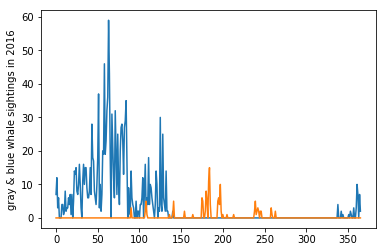

In [16]:
#for the meaned data (i.e. days w/o data were entered as the mean of the surrounding days) of gray whales in 2016
plt.plot(grays_2016)
plt.plot(blues_2016)
plt.ylabel('gray & blue whale sightings in 2016')
plt.show()

***
## 2015 Data

In [17]:
y = years[13] #2015
# first we get the HTML code from this specific year's url:
year_page = requests.get(y)
tree = html.fromstring(year_page.content)

dates = tree.xpath('//*[@id="post-9502"]/div/table/tbody/tr[*]/td[1]/text()')
print(len(dates))  #we see that November 29th is repeated twice...we'll have to account for this

366


In [18]:
print(dates[31:36])

['Nov 30', 'Nov 29', 'Nov 29', 'Nov 28', 'Nov 27']


In [19]:
rev_data_2015 = np.zeros((366,9))
#rev_data_2015 columns are: ['Day', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

for i in range(2,368):
    #rev_data_2014[i-2,0]=367-i
    temp = ' '.join(tree.xpath('//*[@id="post-9502"]/div/table/tbody/tr['+ str(i) + ']/td[7]//text()'))
    gray = (re.findall(r"(\d+)\s*Gray", temp))
    if gray:  #if the list is not empty, ie a whale was found
        rev_data_2015[i-2,1]=int(gray[0])
    fin = (re.findall(r"(\d+)\s*Fin", temp))
    if fin:  #if the list is not empty, ie a whale was found
        rev_data_2015[i-2,2]=int(fin[0])
    humpback = (re.findall(r"(\d+)\s*Humpback", temp))
    if humpback:  #if the list is not empty, ie a whale was found
        rev_data_2015[i-2,3]=int(humpback[0])
    blue = (re.findall(r"(\d+)\s*Blue", temp))
    if blue:  #if the list is not empty, ie a whale was found
        rev_data_2015[i-2,4]=int(blue[0])
    minke = (re.findall(r"(\d+)\s*Minke", temp))
    if minke:  #if the list is not empty, ie a whale was found
        rev_data_2015[i-2,5]=int(minke[0])
    falsek = (re.findall(r"(\d+)\s*False", temp))
    if falsek:  #if the list is not empty, ie a whale was found
        rev_data_2015[i-2,6]=int(falsek[0])
    orca = (re.findall(r"(\d+)\s*Orca", temp))    #this year they are labeled as Orca instead of Killer Whale
    if orca:  #if the list is not empty, ie a whale was found
        rev_data_2015[i-2,7]=int(orca[0])
    sei = (re.findall(r"(\d+)\s*Sei", temp))
    if sei:  #if the list is not empty, ie a whale was found
        rev_data_2015[i-2,8]=int(sei[0])
#print(rev_data_2015[30:35,:])   
rev_data_2015 = np.delete(rev_data_2015, (32), axis=0)  #we want to delete row 33 since November 29th was recorded twice
#print(rev_data_2015[30:35,:]) 
#print(np.shape(rev_data_2015))
for i in range(365):
    rev_data_2015[i,0]=365-i
#print(rev_data_2015[0:10,:]) 
data_2015 = rev_data_2015[::-1]
#print(data_2015[0:25,:])

In [20]:
grays = data_2015[:,1]  #gray whales are column 2 - no heading
grays_2015 = list(map(int, grays))

blues = data_2015[0:,4]  #blue whales are column 5 - no heading
blues_2015 = list(map(int, blues))

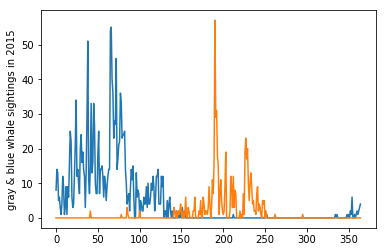

In [21]:
#for the meaned data (i.e. days w/o data were entered as the mean of the surrounding days) of gray whales in 2015
plt.plot(grays_2015)
plt.plot(blues_2015)
plt.ylabel('gray & blue whale sightings in 2015')
plt.show()

***
## 2014 Data

In [22]:
y = years[12] #2014
# first we get the HTML code from this specific year's url:
year_page = requests.get(y)
tree = html.fromstring(year_page.content)

dates = tree.xpath('//*[@id="post-7957"]/div/table/tbody/tr[*]/td[1]/text()')
print(len(dates))  #make sure we have 365 for this method

365


In [23]:
rev_data_2014 = np.zeros((365,9))
#rev_data_2014 columns are: ['Day', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

for i in range(2,367):
    rev_data_2014[i-2,0]=367-i
    temp = ' '.join(tree.xpath('//*[@id="post-7957"]/div/table/tbody/tr['+ str(i) + ']/td[7]//text()'))
    gray = (re.findall(r"(\d+)\s*Gray", temp))
    if gray:  #if the list is not empty, ie a whale was found
        rev_data_2014[i-2,1]=int(gray[0])
    fin = (re.findall(r"(\d+)\s*Fin", temp))
    if fin:  #if the list is not empty, ie a whale was found
        rev_data_2014[i-2,2]=int(fin[0])
    humpback = (re.findall(r"(\d+)\s*Humpback", temp))
    if humpback:  #if the list is not empty, ie a whale was found
        rev_data_2014[i-2,3]=int(humpback[0])
    blue = (re.findall(r"(\d+)\s*Blue", temp))
    if blue:  #if the list is not empty, ie a whale was found
        rev_data_2014[i-2,4]=int(blue[0])
    minke = (re.findall(r"(\d+)\s*Minke", temp))
    if minke:  #if the list is not empty, ie a whale was found
        rev_data_2014[i-2,5]=int(minke[0])
    falsek = (re.findall(r"(\d+)\s*False", temp))
    if falsek:  #if the list is not empty, ie a whale was found
        rev_data_2014[i-2,6]=int(falsek[0])
    orca = (re.findall(r"(\d+)\s*Killer", temp))
    if orca:  #if the list is not empty, ie a whale was found
        rev_data_2014[i-2,7]=int(orca[0])
    sei = (re.findall(r"(\d+)\s*Sei", temp))
    if sei:  #if the list is not empty, ie a whale was found
        rev_data_2014[i-2,8]=int(sei[0])
#print(rev_data_2014[0:20,:])
data_2014 = rev_data_2014[::-1]
#print(data_2014[0:10,:])

In [24]:
#from the "Other" column on the data, the only thing we missed was False Killer Whales on Mar 12 & 13, 
#so I manually add that data here
data_2014[70,6] = 45
data_2014[71,6] = 45

In [25]:
grays = data_2014[:,1]  #gray whales are column 2 - no heading
grays_2014 = list(map(int, grays))

blues = data_2014[0:,4]  #blue whales are column 5 - no heading
blues_2014 = list(map(int, blues))

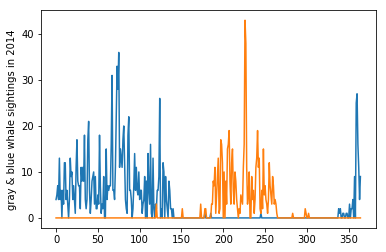

In [26]:
#for the meaned data (i.e. days w/o data were entered as the mean of the surrounding days) of gray whales in 2014
plt.plot(grays_2014)
plt.plot(blues_2014)
plt.ylabel('gray & blue whale sightings in 2014')
plt.show()

*** 
## 2013 Data

In [27]:
y = years[11] #2013
# first we get the HTML code from this specific year's url:
year_page = requests.get(y)
tree = html.fromstring(year_page.content)

dates = tree.xpath('//*[@id="post-5198"]/div/table/tbody/tr[*]/td[1]/text()')
print(len(dates)) #we need to make sure they have all dates for the direct method

365


In [28]:
rev_data_2013 = np.zeros((365,9))
#rev_data_2013 columns are: ['Day', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

for i in range(2,367):
    rev_data_2013[i-2,0]=367-i
    temp = ' '.join(tree.xpath('//*[@id="post-5198"]/div/table/tbody/tr['+ str(i) + ']/td[7]//text()'))
    gray = (re.findall(r"(\d+)\s*Gray", temp))
    if gray:  #if the list is not empty, ie a whale was found
        rev_data_2013[i-2,1]=int(gray[0])
    fin = (re.findall(r"(\d+)\s*Fin", temp))
    if fin:  #if the list is not empty, ie a whale was found
        rev_data_2013[i-2,2]=int(fin[0])
    humpback = (re.findall(r"(\d+)\s*Humpback", temp))
    if humpback:  #if the list is not empty, ie a whale was found
        rev_data_2013[i-2,3]=int(humpback[0])
    blue = (re.findall(r"(\d+)\s*Blue", temp))
    if blue:  #if the list is not empty, ie a whale was found
        rev_data_2013[i-2,4]=int(blue[0])
    minke = (re.findall(r"(\d+)\s*Minke", temp))
    if minke:  #if the list is not empty, ie a whale was found
        rev_data_2013[i-2,5]=int(minke[0])
    falsek = (re.findall(r"(\d+)\s*False", temp))
    if falsek:  #if the list is not empty, ie a whale was found
        rev_data_2013[i-2,6]=int(falsek[0])
    orca = (re.findall(r"(\d+)\s*Killer", temp))
    if orca:  #if the list is not empty, ie a whale was found
        rev_data_2013[i-2,7]=int(orca[0])
    sei = (re.findall(r"(\d+)\s*Sei", temp))
    if sei:  #if the list is not empty, ie a whale was found
        rev_data_2013[i-2,8]=int(sei[0])
#print(rev_data_2013[0:20,:])
data_2013 = rev_data_2013[::-1]
#print(data_2013[0:15,:])

In [29]:
grays = data_2013[:,1]  #gray whales are column 2 - no heading
grays_2013 = list(map(int, grays))

blues = data_2013[0:,4]  #blue whales are column 5 - no heading
blues_2013 = list(map(int, blues))

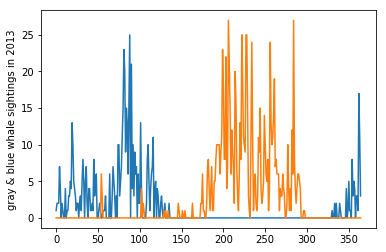

In [30]:
#for the meaned data (i.e. days w/o data were entered as the mean of the surrounding days) of gray whales in 2013
plt.plot(grays_2013)
plt.plot(blues_2013)
plt.ylabel('gray & blue whale sightings in 2013')
plt.show()

***
## 2012 Data

In [31]:
y = years[10] #2012
# first we get the HTML code from this specific year's url:
year_page = requests.get(y)
tree = html.fromstring(year_page.content)

In [32]:
table_2012 = [['Date', 'Whales - to be sorted', 'Other - to be sorted','Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']]  #date, gray whales, other whales
for day in range(2,367):  #in case of a leap year
    table_2012.append([ \
                       ' '.join(tree.xpath('//*[@id="post-2416"]/div/table/tbody/tr['+ str(day) + ']/td[1]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-2416"]/div/table/tbody/tr['+ str(day) + ']/td[7]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-2416"]/div/table/tbody/tr['+ str(day) + ']/td[8]//text()')) \
                      ])
#print(table_2012)

In [33]:
myFile = open('whales_2012_raw.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(table_2012)

In [34]:
with open("whales_2012_sorted_meaned_csv.csv") as f:
    reader = csv.reader(f)
    #next(reader) # skip header
    data_2012 = [r for r in reader]

In [35]:
data_2012 = np.array(data_2012)

grays = data_2012[1:,2]  #gray whales are column 3 - first row is the heading
grays_2012 = list(map(int, grays))

blues = data_2012[1:,5]  #blue whales are column 6 - first row is the heading
blues_2012 = list(map(int, blues))

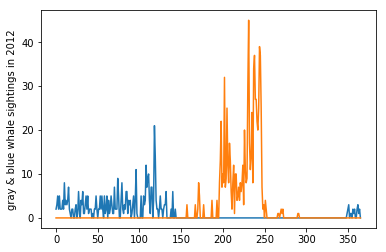

In [36]:
#for the meaned data (i.e. days w/o data were entered as the mean of the surrounding days) of gray whales in 2012
plt.plot(grays_2012)
plt.plot(blues_2012)
plt.ylabel('gray & blue whale sightings in 2012')
plt.show()

***
## 2011 Data

In [37]:
y = years[9] #2011
# first we get the HTML code from this specific year's url:
year_page = requests.get(y)
tree = html.fromstring(year_page.content)

In [38]:
table_2011 = [['Date', 'Whales - to be sorted', 'Other - to be sorted','Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']]  #date, gray whales, other whales
for day in range(2,367):  #in case of a leap year
    table_2011.append([ \
                       ' '.join(tree.xpath('//*[@id="post-1295"]/div/table/tbody/tr['+ str(day) + ']/td[1]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-1295"]/div/table/tbody/tr['+ str(day) + ']/td[7]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-1295"]/div/table/tbody/tr['+ str(day) + ']/td[8]//text()')) \
                      ])
#print(table_2011)

In [39]:
myFile = open('whales_2011_raw.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(table_2011)

In [40]:
with open("whales_2011_sorted_meaned_csv.csv") as f:
    reader = csv.reader(f)
    #next(reader) # skip header
    data_2011 = [r for r in reader]

In [41]:
data_2011 = np.array(data_2011)

grays = data_2011[1:,2]  #gray whales are column 3 - first row is the heading
grays_2011 = list(map(int, grays))

blues = data_2011[1:,5]  #blue whales are column 6 - first row is the heading
blues_2011 = list(map(int, blues))

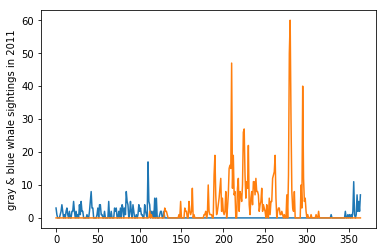

In [42]:
#for the meaned data (i.e. days w/o data were entered as the mean of the surrounding days) of gray whales in 2011
plt.plot(grays_2011)
plt.plot(blues_2011)
plt.ylabel('gray & blue whale sightings in 2011')
plt.show()

***
## 2010 Data

In [43]:
y = years[8] #2010
# first we get the HTML code from this specific year's url:
year_page = requests.get(y)
tree = html.fromstring(year_page.content)

In [44]:
table_2010 = [['Date', 'Whales - to be sorted', 'Other - to be sorted','Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']]  #date, gray whales, other whales
for day in range(2,367):  #in case of a leap year
    table_2010.append([ \
                       ' '.join(tree.xpath('//*[@id="post-1305"]/div/table/tbody/tr['+ str(day) + ']/td[1]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-1305"]/div/table/tbody/tr['+ str(day) + ']/td[7]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-1305"]/div/table/tbody/tr['+ str(day) + ']/td[8]//text()')) \
                      ])
#print(table_2010)

In [45]:
myFile = open('whales_2010_raw.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(table_2010)

In [46]:
with open("whales_2010_sorted_meaned_csv.csv") as f:
    reader = csv.reader(f)
    #next(reader) # skip header
    data_2010 = [r for r in reader]

In [47]:
data_2010 = np.array(data_2010)

grays = data_2010[1:,2]  #gray whales are column 3 - first row is the heading
grays_2010 = list(map(int, grays))

blues = data_2010[1:,5]  #blue whales are column 6 - first row is the heading
blues_2010 = list(map(int, blues))

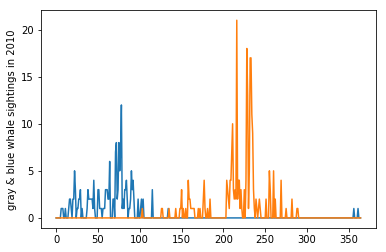

In [48]:
#for the meaned data (i.e. days w/o data were entered as the mean of the surrounding days) of gray whales in 2010
plt.plot(grays_2010)
plt.plot(blues_2010)
plt.ylabel('gray & blue whale sightings in 2010')
plt.show()

***
## 2009 Data

In [49]:
y = years[7] #2009
# first we get the HTML code from this specific year's url:
year_page = requests.get(y)
tree = html.fromstring(year_page.content)

In [50]:
table_2009 = [['Date', 'Whales - to be sorted', 'Other - to be sorted','Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']]  #date, gray whales, other whales
for day in range(2,367):  #in case of a leap year
    table_2009.append([ \
                       ' '.join(tree.xpath('//*[@id="post-1331"]/div/table/tbody/tr['+ str(day) + ']/td[1]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-1331"]/div/table/tbody/tr['+ str(day) + ']/td[7]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-1331"]/div/table/tbody/tr['+ str(day) + ']/td[8]//text()')) \
                      ])
#print(table_2009)

In [51]:
myFile = open('whales_2009_raw.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(table_2009)

In [52]:
with open("whales_2009_sorted_meaned_csv.csv") as f:
    reader = csv.reader(f)
    #next(reader) # skip header
    data_2009 = [r for r in reader]

In [53]:
data_2009 = np.array(data_2009)

grays = data_2009[1:,2]  #gray whales are column 3 - first row is the heading
grays_2009 = list(map(int, grays))

blues = data_2009[1:,5]  #blue whales are column 6 - first row is the heading
blues_2009 = list(map(int, blues))

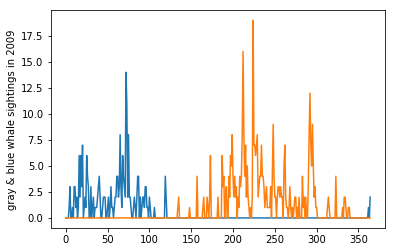

In [54]:
#for the meaned data (i.e. days w/o data were entered as the mean of the surrounding days) of gray whales in 2009
plt.plot(grays_2009)
plt.plot(blues_2009)
plt.ylabel('gray & blue whale sightings in 2009')
plt.show()

***
## 2008 Data

In [55]:
y = years[6] #2008
# first we get the HTML code from this specific year's url:
year_page = requests.get(y)
tree = html.fromstring(year_page.content)

In [56]:
table_2008 = [['Date', 'Whales - to be sorted', 'Other - to be sorted','Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']]  #date, gray whales, other whales
for day in range(2,367):  #in case of a leap year
    table_2008.append([ \
                       ' '.join(tree.xpath('//*[@id="post-1337"]/div/table/tbody/tr['+ str(day) + ']/td[1]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-1337"]/div/table/tbody/tr['+ str(day) + ']/td[6]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-1337"]/div/table/tbody/tr['+ str(day) + ']/td[7]//text()')) \
                      ])
#print(table_2008)

In [57]:
myFile = open('whales_2008_raw.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(table_2008)

In [58]:
with open("whales_2008_sorted_meaned_csv.csv") as f:
    reader = csv.reader(f)
    #next(reader) # skip header
    data_2008 = [r for r in reader]

In [59]:
data_2008 = np.array(data_2008)

grays = data_2008[1:,2]  #gray whales are column 3 - first row is the heading
grays_2008 = list(map(int, grays))

blues = data_2008[1:,5]  #blue whales are column 6 - first row is the heading
blues_2008 = list(map(int, blues))

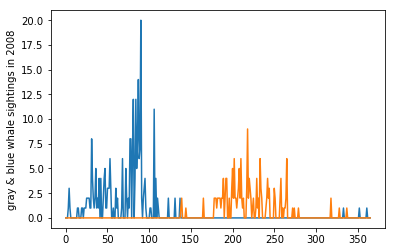

In [60]:
#for the meaned data (i.e. days w/o data were entered as the mean of the surrounding days) of gray whales in 2008
plt.plot(grays_2008)
plt.plot(blues_2008)
plt.ylabel('gray & blue whale sightings in 2008')
plt.show()

***
## 2007 Data

In [61]:
y = years[5] #2007
# first we get the HTML code from this specific year's url:
year_page = requests.get(y)
tree = html.fromstring(year_page.content)

In [62]:
table_2007 = [['Date', 'Whales - to be sorted', 'Other - to be sorted','Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']]  #date, gray whales, other whales
for day in range(2,367):  #in case of a leap year
    table_2007.append([ \
                       ' '.join(tree.xpath('//*[@id="post-1349"]/div/table/tbody/tr['+ str(day) + ']/td[1]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-1349"]/div/table/tbody/tr['+ str(day) + ']/td[6]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-1349"]/div/table/tbody/tr['+ str(day) + ']/td[7]//text()')) \
                      ])
#print(table_2007)

In [63]:
myFile = open('whales_2007_raw.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(table_2007)

In [64]:
with open("whales_2007_sorted_meaned_csv.csv") as f:
    reader = csv.reader(f)
    #next(reader) # skip header
    data_2007 = [r for r in reader]

In [65]:
data_2007 = np.array(data_2007)

grays = data_2007[1:,2]  #gray whales are column 3 - first row is the heading
grays_2007 = list(map(int, grays))

blues = data_2007[1:,5]  #blue whales are column 6 - first row is the heading
blues_2007 = list(map(int, blues))

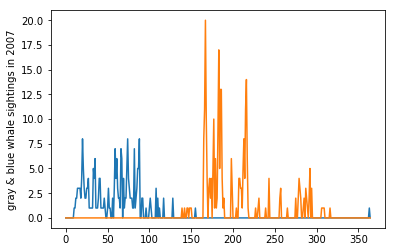

In [66]:
#for the meaned data (i.e. days w/o data were entered as the mean of the surrounding days) of gray whales in 2007
plt.plot(grays_2007)
plt.plot(blues_2007)
plt.ylabel('gray & blue whale sightings in 2007')
plt.show()

***
## 2006 Data

In [67]:
y = years[4] #2006
# first we get the HTML code from this specific year's url:
year_page = requests.get(y)
tree = html.fromstring(year_page.content)

In [68]:
table_2006 = [['Date', 'Whales - to be sorted', 'Other - to be sorted','Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']]  #date, gray whales, other whales
for day in range(2,367):  #in case of a leap year
    table_2006.append([ \
                       ' '.join(tree.xpath('//*[@id="post-1362"]/div/table/tbody/tr['+ str(day) + ']/td[1]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-1362"]/div/table/tbody/tr['+ str(day) + ']/td[6]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-1362"]/div/table/tbody/tr['+ str(day) + ']/td[7]//text()')) \
                      ])
#print(table_2006)

In [69]:
myFile = open('whales_2006_raw.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(table_2006)

In [70]:
with open("whales_2006_sorted_meaned_csv.csv") as f:
    reader = csv.reader(f)
    #next(reader) # skip header
    data_2006 = [r for r in reader]
    
data_2006 = np.array(data_2006)

In [71]:
grays = data_2006[1:,2]  #gray whales are column 3 - first row is the heading
grays_2006 = list(map(int, grays))

blues = data_2006[1:,5]  #blue whales are column 6 - first row is the heading
blues_2006 = list(map(int, blues))

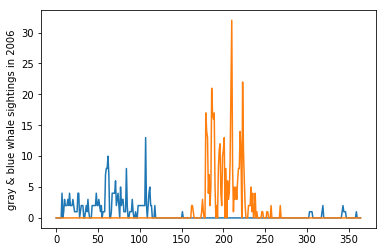

In [72]:
#for the meaned data (i.e. days w/o data were entered as the mean of the surrounding days) of gray whales in 2006
plt.plot(grays_2006)
plt.plot(blues_2006)
plt.ylabel('gray & blue whale sightings in 2006')
plt.show()

***
## 2005 Data

In [73]:
y = years[3] #2005
# first we get the HTML code from this specific year's url:
year_page = requests.get(y)
tree = html.fromstring(year_page.content)

In [74]:
table_2004 = [['Date', 'Whales - to be sorted', 'Other - to be sorted','Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']]  #date, gray whales, other whales
for day in range(2,367):  #in case of a leap year
    table_2004.append([ \
                       ' '.join(tree.xpath('//*[@id="post-1367"]/div/table/tbody/tr['+ str(day) + ']/td[1]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-1367"]/div/table/tbody/tr['+ str(day) + ']/td[7]//text()')), \
                       ' '.join(tree.xpath('//*[@id="post-1367"]/div/table/tbody/tr['+ str(day) + ']/td[6]//text()')) \
                      ])
#print(table_2004)

In [75]:
myFile = open('whales_2005_raw.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(table_2004)

In [76]:
with open('whales_2005_sorted_meaned_csv.csv') as f:
    reader = csv.reader(f)
    #next(reader) # skip header
    data_2005 = [r for r in reader]

In [77]:
data_2005 = np.array(data_2005)
print(data_2005[0,:])
#print()
#print(data_2005)

['Day' 'Date' 'Gray Whales' 'Fin Whales' 'Humpback Whales' 'Blue Whales'
 'Minke Whales' 'False Killer Whales' 'Orca Whales']


In [78]:
grays = data_2005[1:,2]
grays_2005 = list(map(int, grays))

blues = data_2005[1:,5]
blues_2005 = list(map(int, blues))

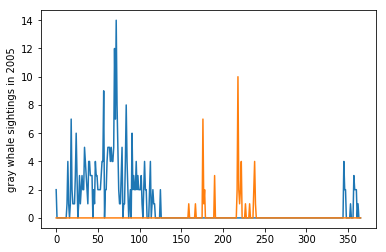

In [79]:
#for the meaned data (i.e. days w/o data were entered as the mean of the surrounding days) of gray whales in 2005
plt.plot(grays_2005)
plt.plot(blues_2005)
plt.ylabel('gray whale sightings in 2005')
plt.show()

Excellent!  We've now scraped all of our data from the web!

***
## Let's combine all the years worth of data together to see the overall trend

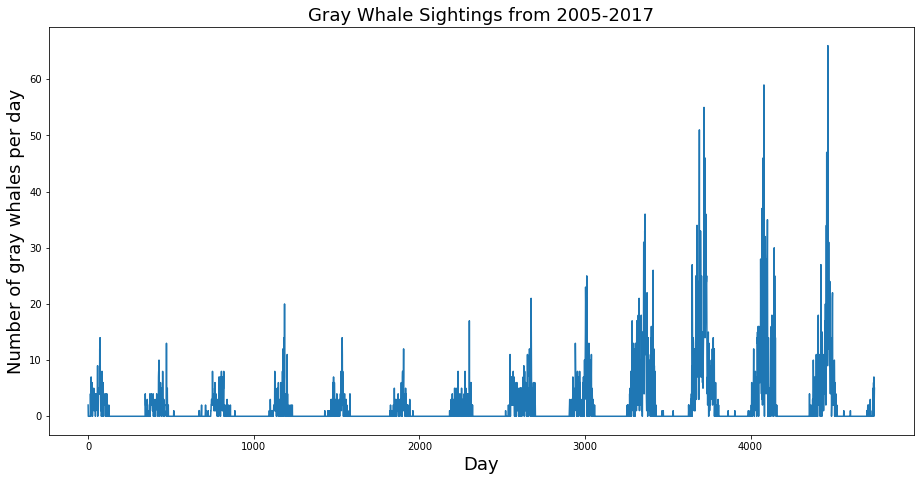

In [80]:
all_grays = grays_2005+grays_2006+grays_2007+grays_2008+grays_2009+grays_2010+grays_2011+ \
        grays_2012+grays_2013+grays_2014+grays_2015+grays_2016+grays_2017

fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)    
plt.plot(all_grays)
plt.title('Gray Whale Sightings from 2005-2017', fontsize=18)
plt.ylabel('Number of gray whales per day', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.show()

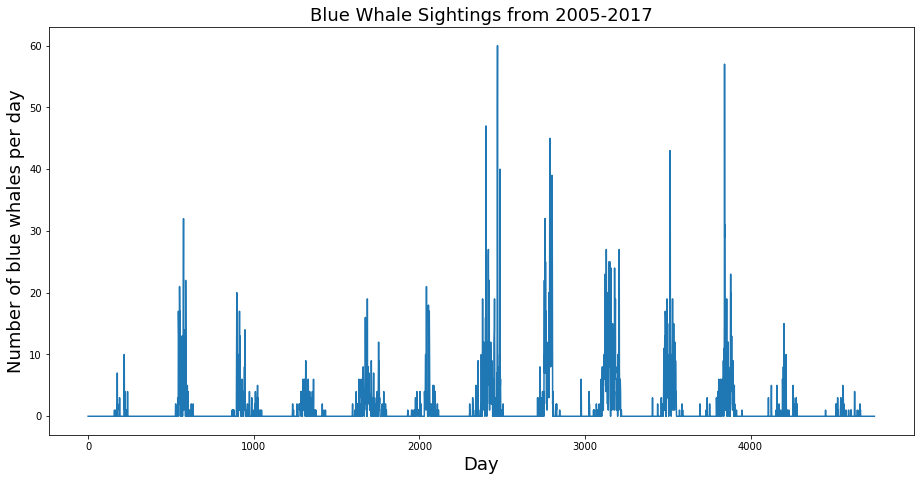

In [81]:
all_blues = blues_2005+blues_2006+blues_2007+blues_2008+blues_2009+blues_2010+blues_2011+ \
        blues_2012+blues_2013+blues_2014+blues_2015+blues_2016+blues_2017

fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)    
plt.plot(all_blues)
plt.title('Blue Whale Sightings from 2005-2017', fontsize=18)
plt.ylabel('Number of blue whales per day', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.show()

***
## Let's collect together the other whale species datas to make similar plots

In [82]:
#2005 other whale species data pulled out
#data_2005 columns are: ['Day', 'Date', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales']

fin = data_2005[1:,3]
fin_2005 = list(map(int, fin))

humpback = data_2005[1:,4]
humpback_2005 = list(map(int, humpback))

minke = data_2005[1:,6]
minke_2005 = list(map(int, minke))

false_killer = data_2005[1:,7]
false_killer_2005 = list(map(int, false_killer))

orca = data_2005[1:,8]
orca_2005 = list(map(int, orca))

sei_2005 = [0] * 366  #no data because none seen

In [83]:
#2006 other whale species data pulled out
#data_2006 columns are: ['Day', 'Date', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

fin = data_2006[1:,3]
fin_2006 = list(map(int, fin))

humpback = data_2006[1:,4]
humpback_2006 = list(map(int, humpback))

minke = data_2006[1:,6]
minke_2006 = list(map(int, minke))

false_killer = data_2006[1:,7]
false_killer_2006 = list(map(int, false_killer))

orca = data_2006[1:,8]
orca_2006 = list(map(int, orca))

sei = data_2006[1:,9]
sei_2006 = list(map(int, sei))

In [84]:
#2007 other whale species data pulled out
#data_2007 columns are: ['Day', 'Date', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

fin = data_2007[1:,3]
fin_2007 = list(map(int, fin))

humpback = data_2007[1:,4]
humpback_2007 = list(map(int, humpback))

minke = data_2007[1:,6]
minke_2007 = list(map(int, minke))

false_killer = data_2007[1:,7]
false_killer_2007 = list(map(int, false_killer))

orca = data_2007[1:,8]
orca_2007 = list(map(int, orca))

sei = data_2007[1:,9]
sei_2007 = list(map(int, sei))

In [85]:
#2008 other whale species data pulled out
#data_2008 columns are: ['Day', 'Date', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

fin = data_2008[1:,3]
fin_2008 = list(map(int, fin))

humpback = data_2008[1:,4]
humpback_2008 = list(map(int, humpback))

minke = data_2008[1:,6]
minke_2008 = list(map(int, minke))

false_killer = data_2008[1:,7]
false_killer_2008 = list(map(int, false_killer))

orca = data_2008[1:,8]
orca_2008 = list(map(int, orca))

sei = data_2008[1:,9]
sei_2008 = list(map(int, sei))

In [86]:
#2009 other whale species data pulled out
#data_2009 columns are: ['Day', 'Date', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

fin = data_2009[1:,3]
fin_2009 = list(map(int, fin))

humpback = data_2009[1:,4]
humpback_2009 = list(map(int, humpback))

minke = data_2009[1:,6]
minke_2009 = list(map(int, minke))

false_killer = data_2009[1:,7]
false_killer_2009 = list(map(int, false_killer))

orca = data_2009[1:,8]
orca_2009 = list(map(int, orca))

sei = data_2009[1:,9]
sei_2009 = list(map(int, sei))

In [87]:
#2010 other whale species data pulled out
#data_2010 columns are: ['Day', 'Date', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

fin = data_2010[1:,3]
fin_2010 = list(map(int, fin))

humpback = data_2010[1:,4]
humpback_2010 = list(map(int, humpback))

minke = data_2010[1:,6]
minke_2010 = list(map(int, minke))

false_killer = data_2010[1:,7]
false_killer_2010 = list(map(int, false_killer))

orca = data_2010[1:,8]
orca_2010 = list(map(int, orca))

sei = data_2010[1:,9]
sei_2010 = list(map(int, sei))

In [88]:
#2011 other whale species data pulled out
#data_2011 columns are: ['Day', 'Date', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

fin = data_2011[1:,3]
fin_2011 = list(map(int, fin))

humpback = data_2011[1:,4]
humpback_2011 = list(map(int, humpback))

minke = data_2011[1:,6]
minke_2011 = list(map(int, minke))

false_killer = data_2011[1:,7]
false_killer_2011 = list(map(int, false_killer))

orca = data_2011[1:,8]
orca_2011 = list(map(int, orca))

sei = data_2011[1:,9]
sei_2011 = list(map(int, sei))

In [89]:
#2012 other whale species data pulled out
#data_2012 columns are: ['Day', 'Date', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

fin = data_2012[1:,3]
fin_2012 = list(map(int, fin))

humpback = data_2012[1:,4]
humpback_2012 = list(map(int, humpback))

minke = data_2012[1:,6]
minke_2012 = list(map(int, minke))

false_killer = data_2012[1:,7]
false_killer_2012 = list(map(int, false_killer))

orca = data_2012[1:,8]
orca_2012 = list(map(int, orca))

sei = data_2012[1:,9]
sei_2012 = list(map(int, sei))

In [90]:
#2013 other whale species data pulled out
#data_2013 columns are: ['Day', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

fin_2013 = list(data_2013[:,2])
humpback_2013 = list(data_2013[:,3])
minke_2013 = list(data_2013[:,5])
false_killer_2013 = list(data_2013[:,6])
orca_2013 = list(data_2013[:,7])
sei_2013 = list(data_2013[:,8])

In [91]:
#2014 other whale species data pulled out
#data_2014 columns are: ['Day', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

fin_2014 = list(data_2014[:,2])
humpback_2014 = list(data_2014[:,3])
minke_2014 = list(data_2014[:,5])
false_killer_2014 = list(data_2014[:,6])
orca_2014 = list(data_2014[:,7])
sei_2014 = list(data_2014[:,8])

In [92]:
#2015 other whale species data pulled out
#data_2015 columns are: ['Day', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

fin_2015 = list(data_2015[:,2])
humpback_2015 = list(data_2015[:,3])
minke_2015 = list(data_2015[:,5])
false_killer_2015 = list(data_2015[:,6])
orca_2015 = list(data_2015[:,7])
sei_2015 = list(data_2015[:,8])

In [93]:
#2016 other whale species data pulled out
#data_2016 columns are: ['Day', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

fin_2016 = list(data_2016[:,2])
humpback_2016 = list(data_2016[:,3])
minke_2016 = list(data_2016[:,5])
false_killer_2016 = list(data_2016[:,6])
orca_2016 = list(data_2016[:,7])
sei_2016 = list(data_2016[:,8])

In [94]:
#2017 other whale species data pulled out
#data_2017 columns are: ['Day', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

fin_2017 = list(data_2017[:,2])
humpback_2017 = list(data_2017[:,3])
minke_2017 = list(data_2017[:,5])
false_killer_2017 = list(data_2017[:,6])
orca_2017 = list(data_2017[:,7])
sei_2017 = list(data_2017[:,8])

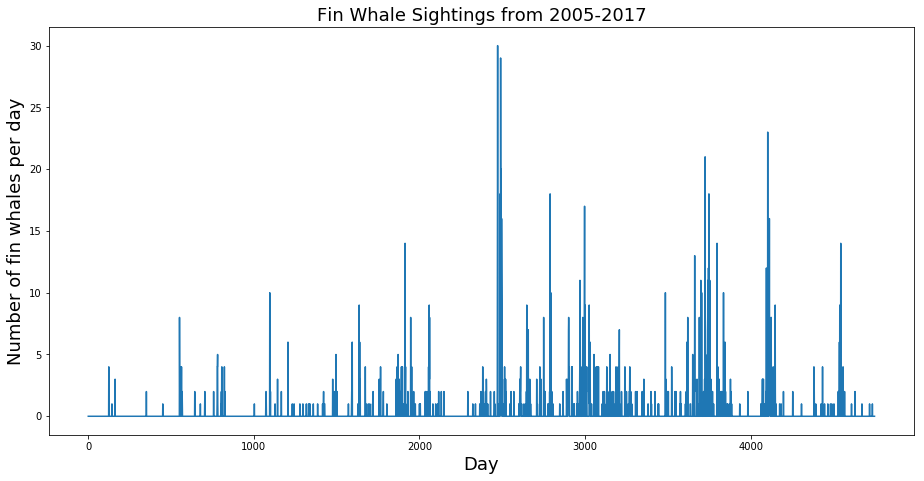

In [95]:
all_fin = fin_2005+fin_2006+fin_2007+fin_2008+fin_2009+fin_2010+fin_2011+ \
        fin_2012+fin_2013+fin_2014+fin_2015+fin_2016+fin_2017

fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)    
plt.plot(all_fin)
plt.title('Fin Whale Sightings from 2005-2017', fontsize=18)
plt.ylabel('Number of fin whales per day', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.show()

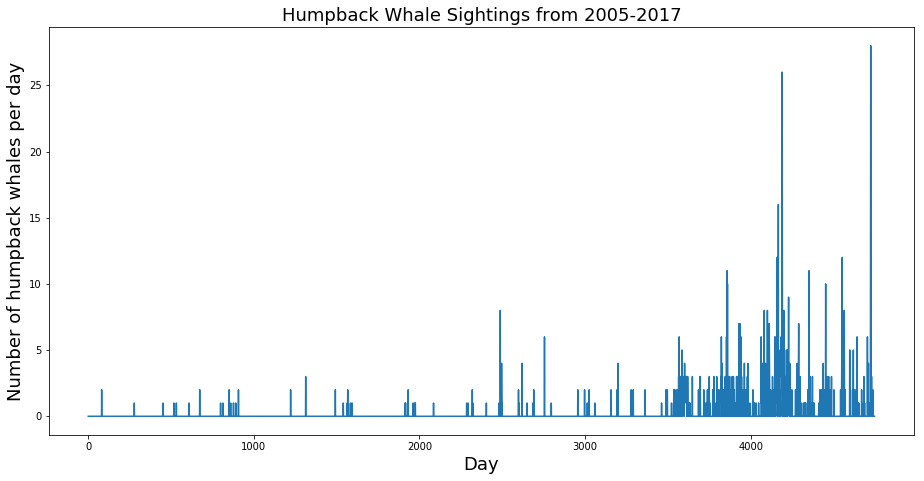

In [96]:
all_humpback = humpback_2005+humpback_2006+humpback_2007+humpback_2008+humpback_2009+humpback_2010+humpback_2011+ \
        humpback_2012+humpback_2013+humpback_2014+humpback_2015+humpback_2016+humpback_2017

fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)    
plt.plot(all_humpback)
plt.title('Humpback Whale Sightings from 2005-2017', fontsize=18)
plt.ylabel('Number of humpback whales per day', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.show()

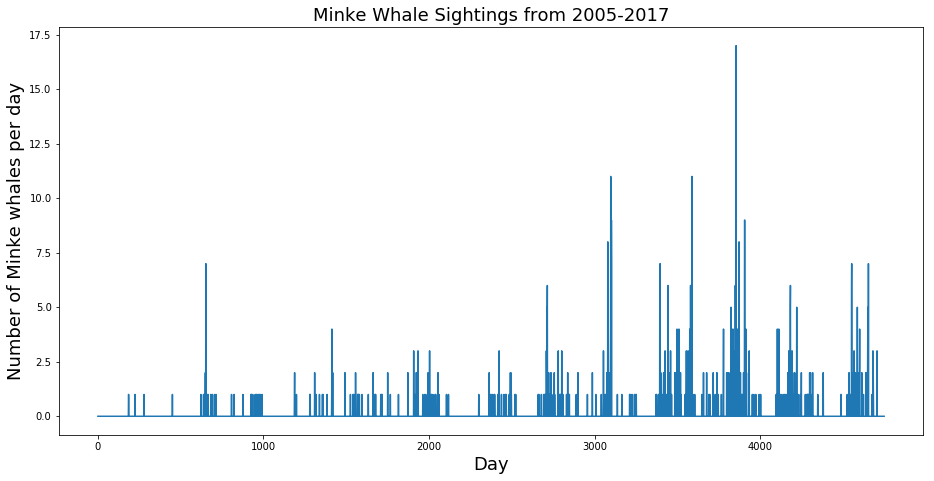

In [97]:
all_minke = minke_2005+minke_2006+minke_2007+minke_2008+minke_2009+minke_2010+minke_2011+ \
        minke_2012+minke_2013+minke_2014+minke_2015+minke_2016+minke_2017

fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)    
plt.plot(all_minke)
plt.title('Minke Whale Sightings from 2005-2017', fontsize=18)
plt.ylabel('Number of Minke whales per day', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.show()

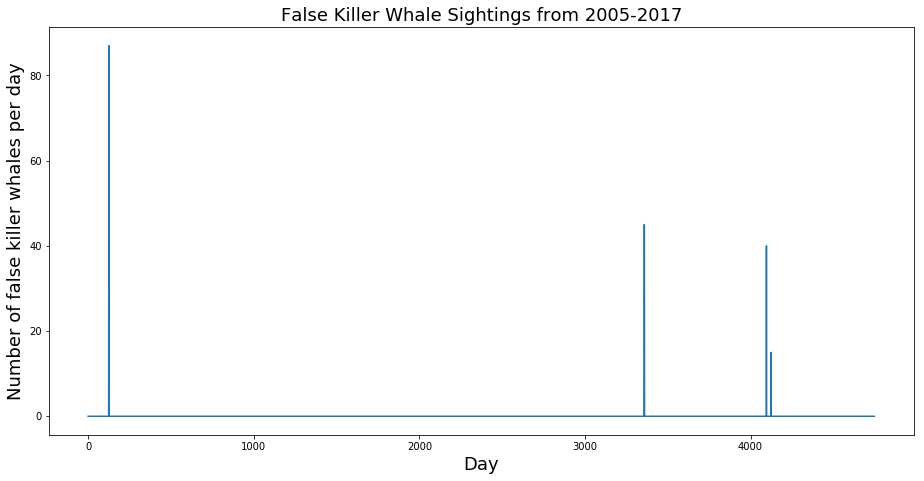

In [98]:
all_false_killer = false_killer_2005+false_killer_2006+false_killer_2007+false_killer_2008+false_killer_2009+false_killer_2010+false_killer_2011+ \
        false_killer_2012+false_killer_2013+false_killer_2014+false_killer_2015+false_killer_2016+false_killer_2017

fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)    
plt.plot(all_false_killer)
plt.title('False Killer Whale Sightings from 2005-2017', fontsize=18)
plt.ylabel('Number of false killer whales per day', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.show()

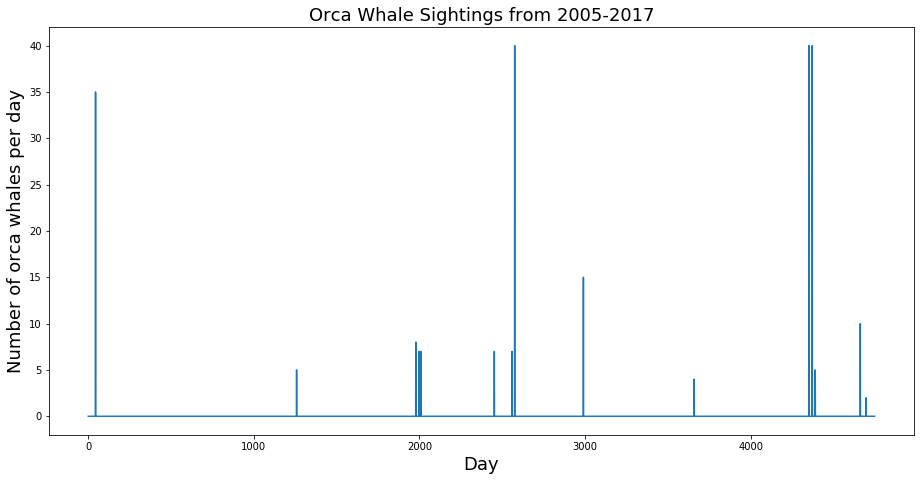

In [99]:
all_orca = orca_2005+orca_2006+orca_2007+orca_2008+orca_2009+orca_2010+orca_2011+ \
        orca_2012+orca_2013+orca_2014+orca_2015+orca_2016+orca_2017

fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)    
plt.plot(all_orca)
plt.title('Orca Whale Sightings from 2005-2017', fontsize=18)
plt.ylabel('Number of orca whales per day', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.show()

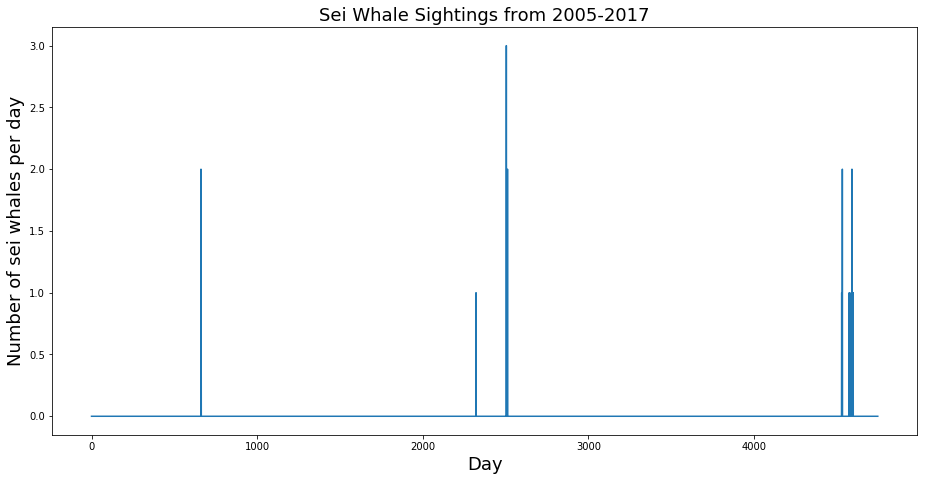

In [100]:
all_sei = sei_2005+sei_2006+sei_2007+sei_2008+sei_2009+sei_2010+sei_2011+ \
        sei_2012+sei_2013+sei_2014+sei_2015+sei_2016+sei_2017

fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)    
plt.plot(all_sei)
plt.title('Sei Whale Sightings from 2005-2017', fontsize=18)
plt.ylabel('Number of sei whales per day', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.show()

***
## Saving all the data in a single CSV file

In [200]:
day_list = []
for i in range(len(all_grays)):
    day_list.append('Day ' + str(i+1))
#print(day_list)

In [203]:
#data_2017 columns are: ['Day', 'Gray Whales' ,'Fin Whales', 'Humpback Whales', 'Blue Whales','Minke Whales', 'False Killer Whales', 'Orca Whales', 'Sei Whales']

all_whales = [['']+day_list, ['Gray Whales']+all_grays,['Fin Whales']+all_fin,['Humpback Whales']+all_humpback, \
              ['Blue Whales']+all_blues,['Minke Whales']+all_minke, ['False Killer Whales']+all_false_killer, \
              ['Orca Whales']+all_orca, ['Sei Whales']+all_sei]


transpose_all_whales = list(map(list, zip(*all_whales)))

In [204]:
myFile = open('all_whales.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(transpose_all_whales)

## This dataset can be found on my GitHub with an extra column added for water temperature under the name: all_whales_and_temp_cleaned.csv